# IMPORTING THE REQUIRED LIBRARIES 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# IMPORTING THE DATASET 

In [3]:
data=pd.read_csv('Housing.csv')
data.head()
# Printing the starting rows of our dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# DATA PREPROCESSING

In [4]:
data.tail()
# Printing the last rows of our dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
data.shape
# shape function shows the rows and column of our dataset

(545, 13)

In [6]:
data.size
# Printing the overall size of our dataset

7085

In [7]:
# Checking the Null Values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
data.info()
# Checking the datatype of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
data.columns
# Printing the columns names of our dataset

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [10]:
data.describe()
# Statistical Measures of our dataset

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# EXPLORATORY DATA ANALYSIS

In [17]:
# to convert the categorical data into numerical labelEncoder method is used
model=LabelEncoder()
list=['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea', 'furnishingstatus']
for i in list:
    data[i]=model.fit_transform(data[i])
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [18]:
model1=StandardScaler()
list=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','parking', 'prefarea', 'furnishingstatus']
for i in list:
    data[[i]]=model1.fit_transform(data[[i]])
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-1.406286
1,12250000,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-1.406286
2,12250000,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.091662
3,12215000,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-1.406286
4,11410000,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-1.406286


In [19]:
data.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


<AxesSubplot:>

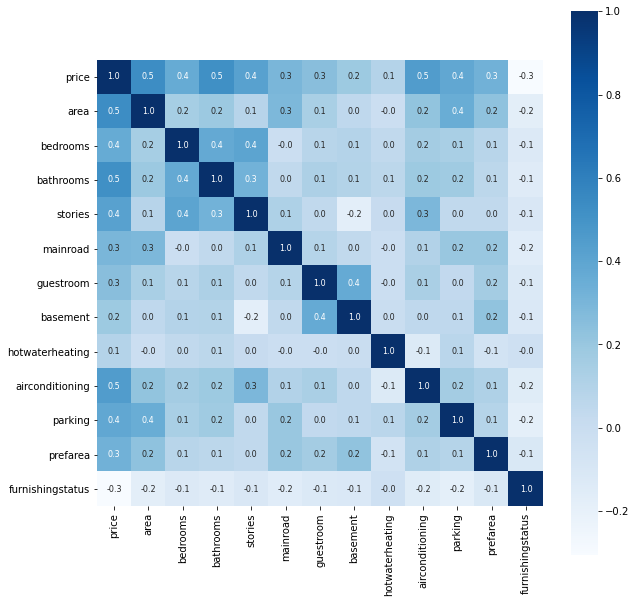

In [22]:
#Finding the coreelation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

# TRAIN TEST SPLIT

In [24]:
x=data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]]
y=data['price']

In [25]:
print(x)

         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0    1.046726  1.403419   1.421812  1.378217  0.405623  -0.465315 -0.734539   
1    1.757010  1.403419   5.405809  2.532024  0.405623  -0.465315 -0.734539   
2    2.218232  0.047278   1.421812  0.224410  0.405623  -0.465315  1.361397   
3    1.083624  1.403419   1.421812  0.224410  0.405623  -0.465315  1.361397   
4    1.046726  1.403419  -0.570187  0.224410  0.405623   2.149083  1.361397   
..        ...       ...        ...       ...       ...        ...       ...   
540 -0.991879 -1.308863  -0.570187 -0.929397  0.405623  -0.465315  1.361397   
541 -1.268613  0.047278  -0.570187 -0.929397 -2.465344  -0.465315 -0.734539   
542 -0.705921 -1.308863  -0.570187 -0.929397  0.405623  -0.465315 -0.734539   
543 -1.033389  0.047278  -0.570187 -0.929397 -2.465344  -0.465315 -0.734539   
544 -0.599839  0.047278  -0.570187  0.224410  0.405623  -0.465315 -0.734539   

     hotwaterheating  airconditioning   parking  pr

In [26]:
print(y)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x.shape,x_train.shape,x_test.shape

((545, 12), (436, 12), (109, 12))

In [28]:
model=LinearRegression()

In [29]:
model.fit(x_train,y_train)

LinearRegression()

In [31]:
print('Accuracy on Training Data',model.score(x_train,y_train)*100)

Accuracy on Training Data 68.09987305547797


In [32]:
print('Accuracy on Testing Data',model.score(x_test,y_test)*100)

Accuracy on Testing Data 65.78047592637606


In [33]:
y_pred=model.predict(x_test)
print(y_pred)

[ 4019080.69890148  6258021.76856396  4392719.13411049  7335082.21688188
  2892857.56615676  7084655.57701773  3258634.73504732  3196499.16068632
  3520106.01134942  8359610.28845462  6646926.36096855  3788844.63269237
  3734072.96467982  4616010.40973201  3946124.94405791  2023177.46846872
  3975554.48783028  3624716.96500889  3210282.7421617   4668411.38105794
  5893719.66376512  6415683.83807235  4657036.55831934  2704096.11205269
  5356909.86181448  5740682.56798043  5337586.47961081  5444859.96648234
  5702144.57144376  5865872.30432731  3307327.30668416  6299491.02684294
  7123479.95544319  2960326.86653053  4424323.1948382   5125081.85591294
  4947693.93115736  3629027.81981124  2975421.52734787  3975089.54021922
  8106313.95534001  5014658.87529548  6469749.69804857  3566139.31348661
  3868652.86219466  6344993.74699856  4482572.73153155  2740240.08968071
  4105384.15298297  6518557.36176521  3976558.93952635  7056307.68945585
  2586714.16696758  2947687.80114419  3553624.39318

In [34]:
data1=pd.DataFrame({"actual result":y_test,'predicted result':y_pred})
print(data1)

     actual result  predicted result
239        4585000      4.019081e+06
113        6083000      6.258022e+06
325        4007500      4.392719e+06
66         6930000      7.335082e+06
479        2940000      2.892858e+06
..             ...               ...
76         6650000      7.400968e+06
132        5810000      5.138942e+06
311        4123000      4.058811e+06
464        3080000      4.972826e+06
155        5530000      6.367950e+06

[109 rows x 2 columns]


In [35]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_pred,y_test)
print(r2_score)

0.5925651751218672
